In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [12]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

Vizualize data

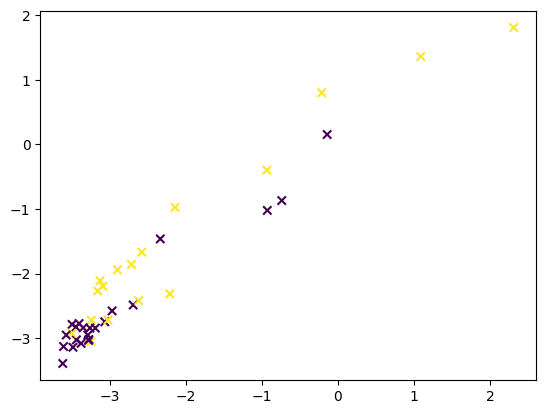

In [13]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [14]:
csp_test_classifiers(12,time_config, 7, 2)

Epoch 1/15
1/1 [==============================] - 1s 774ms/step - loss: 0.3893 - accuracy: 0.5484
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3869 - accuracy: 0.5484
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3845 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3820 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3796 - accuracy: 0.5484
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3771 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 18ms/step - loss: 0.3746 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3721 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 17ms/step - loss: 0.3696 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3671 - accuracy: 0.5484
Epoch 11/15
1/1 [================

1/1 [==============================] - 0s 166ms/step - loss: 0.2517 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 606ms/step - loss: 0.2799 - accuracy: 0.5484
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2770 - accuracy: 0.5484
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2741 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2713 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2685 - accuracy: 0.5484
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2657 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2630 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2603 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2577 - accuracy: 0.5806
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 10ms/step - loss: 0.4080 - accuracy: 0.0323
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4045 - accuracy: 0.0323
Epoch 15/15
1/1 [==============================] - 0s 151ms/step - loss: 0.3190 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 635ms/step - loss: 0.4609 - accuracy: 0.0645
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4578 - accuracy: 0.0645
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4548 - accuracy: 0.0645
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4518 - accuracy: 0.0645
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.0645
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4457 - accuracy: 0.0645
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.4427 - accuracy: 0.0645
Epoch 8/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2007 - accuracy: 0.6452
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1982 - accuracy: 0.6452
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.1957 - accuracy: 0.6452
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1932 - accuracy: 0.6774
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1908 - accuracy: 0.6774
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1883 - accuracy: 0.6774
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1858 - accuracy: 0.6774
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1835 - accuracy: 0.7097
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.7097
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1789 - accuracy: 0.7097
Epoch 12/15
1/1 [==============================]

1/1 [==============================] - 0s 41ms/step - loss: 0.2335 - accuracy: 0.5806
Epoch 8/15
1/1 [==============================] - 0s 18ms/step - loss: 0.2313 - accuracy: 0.6452
Epoch 9/15
1/1 [==============================] - 0s 24ms/step - loss: 0.2292 - accuracy: 0.6452
Epoch 10/15
1/1 [==============================] - 0s 17ms/step - loss: 0.2271 - accuracy: 0.6452
Epoch 11/15
1/1 [==============================] - 0s 22ms/step - loss: 0.2249 - accuracy: 0.6452
Epoch 12/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2229 - accuracy: 0.6452
Epoch 13/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2209 - accuracy: 0.6452
Epoch 14/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2189 - accuracy: 0.6774
Epoch 15/15
1/1 [==============================] - 0s 198ms/step - loss: 0.2690 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 717ms/step - loss: 0.2910 - accuracy: 0.3871
Epoch 2/15
1/1 [==================

1/1 [==============================] - 0s 18ms/step - loss: 0.2559 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================] - 0s 12ms/step - loss: 0.2529 - accuracy: 0.5484
Epoch 14/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2499 - accuracy: 0.5484
Epoch 15/15
1/1 [==============================] - 0s 149ms/step - loss: 0.3181 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 742ms/step - loss: 0.5699 - accuracy: 0.3871
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.4194
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5661 - accuracy: 0.4194
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.4194
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.4194
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5604 - accuracy: 0.4194
Epoch 7/15
1/1 [=========================

1/1 [==============================] - 1s 604ms/step - loss: 0.1817 - accuracy: 0.8065
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1797 - accuracy: 0.8065
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1776 - accuracy: 0.8387
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1756 - accuracy: 0.8387
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1737 - accuracy: 0.8387
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1717 - accuracy: 0.8387
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1699 - accuracy: 0.8387
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1680 - accuracy: 0.8387
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1662 - accuracy: 0.8387
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1644 - accuracy: 0.8387
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2093 - accuracy: 0.7419
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2075 - accuracy: 0.7419
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2057 - accuracy: 0.7419
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2039 - accuracy: 0.7742
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2021 - accuracy: 0.7742
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2003 - accuracy: 0.7742
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1985 - accuracy: 0.7742
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1968 - accuracy: 0.7742
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.7742
Epoch 15/15
1/1 [==============================] - 0s 143ms/step - loss: 0.3978 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 8ms/step - loss: 0.1819 - accuracy: 0.9355
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1806 - accuracy: 1.0000
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1792 - accuracy: 1.0000
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1779 - accuracy: 1.0000
Epoch 15/15
1/1 [==============================] - 0s 138ms/step - loss: 0.2299 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 640ms/step - loss: 0.1433 - accuracy: 0.8065
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1419 - accuracy: 0.9032
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1406 - accuracy: 0.9032
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1393 - accuracy: 0.9032
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1380 - accuracy: 0.9032
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 147ms/step - loss: 0.1798 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 1s 688ms/step - loss: 0.1186 - accuracy: 0.9032
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1172 - accuracy: 0.9032
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1158 - accuracy: 0.9032
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1145 - accuracy: 0.9032
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1131 - accuracy: 0.9032
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1118 - accuracy: 0.9032
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1105 - accuracy: 0.9355
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1091 - accuracy: 0.9355
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1078 - accuracy: 0.9355
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2666 - accuracy: 0.4839
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.4839
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.4839
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2594 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.5806
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.5806
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5806
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2475 - accuracy: 0.5806
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.5806
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.2581
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2923 - accuracy: 0.2903
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.2903
Epoch 13/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2884 - accuracy: 0.2903
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2866 - accuracy: 0.2903
Epoch 15/15
1/1 [==============================] - 0s 156ms/step - loss: 0.3191 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 658ms/step - loss: 0.2044 - accuracy: 0.7419
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.7419
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2008 - accuracy: 0.7419
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1990 - accuracy: 0.7419
Epoch 5/15
1/1 [=========================

1/1 [==============================] - 0s 127ms/step - loss: 0.2095 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 586ms/step - loss: 0.3177 - accuracy: 0.4194
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.4194
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.4194
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3020 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2868 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.5806
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.5806
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2526 - accuracy: 0.5806
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.5806
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2476 - accuracy: 0.5806
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2451 - accuracy: 0.5806
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2426 - accuracy: 0.5806
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2402 - accuracy: 0.6452
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2378 - accuracy: 0.6452
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.6452
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.1648 - accuracy: 0.7419
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1631 - accuracy: 0.7419
Epoch 11/15
1/1 [==============================] - 0s 17ms/step - loss: 0.1614 - accuracy: 0.7419
Epoch 12/15
1/1 [==============================] - 0s 17ms/step - loss: 0.1597 - accuracy: 0.7419
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1580 - accuracy: 0.7419
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1564 - accuracy: 0.7742
Epoch 15/15
1/1 [==============================] - 0s 147ms/step - loss: 0.1763 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 671ms/step - loss: 0.0622 - accuracy: 0.9355
Epoch 2/15
1/1 [==============================] - 0s 16ms/step - loss: 0.0611 - accuracy: 0.9355
Epoch 3/15
1/1 [==============================] - 0s 12ms/step - loss: 0.0600 - accuracy: 0.9355
Epoch 4/15
1/1 [=====================

1/1 [==============================] - 0s 8ms/step - loss: 0.3660 - accuracy: 0.4194
Epoch 15/15
1/1 [==============================] - 0s 276ms/step - loss: 0.3302 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 625ms/step - loss: 0.2223 - accuracy: 0.7097
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2200 - accuracy: 0.7097
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.7097
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.7097
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2133 - accuracy: 0.7097
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2111 - accuracy: 0.7097
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2089 - accuracy: 0.7097
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2067 - accuracy: 0.7097
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2302 - accuracy: 0.5161
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2284 - accuracy: 0.5161
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.5161
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2250 - accuracy: 0.5161
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2233 - accuracy: 0.5161
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2201 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2185 - accuracy: 0.5484
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2169 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2154 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3431 - accuracy: 0.3548
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3394 - accuracy: 0.3548
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.3548
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.3548
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.3548
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.3548
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3213 - accuracy: 0.3871
Epoch 15/15
1/1 [==============================] - 0s 146ms/step - loss: 0.2530 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 869ms/step - loss: 0.2379 - accuracy: 0.5806
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2359 - accuracy: 0.5806
Epoch 3/15
1/1 [========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3745 - accuracy: 0.0968
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 0.0968
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3005 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 1s 556ms/step - loss: 0.2189 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2166 - accuracy: 0.6774
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.6774
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.6774
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2101 - accuracy: 0.6774
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.6774
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.6774
Epoch 8/15
1/1 [=============================

In [15]:
dwt_test_classifiers(3,'db1',time_config)

Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.2994 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.4516
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2958 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.4516
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2991 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.5484
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.5484
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.5484
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2765 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2473 - accuracy: 0.5161
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2435 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2417 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 1s 518ms/step - loss: 0.2310 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 506ms/step - loss: 0.2972 - accuracy: 0.5484
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.5484
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.5484
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 113ms/step - loss: 0.2050 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 502ms/step - loss: 0.3111 - accuracy: 0.2581
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3096 - accuracy: 0.2581
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3081 - accuracy: 0.2581
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3066 - accuracy: 0.2903
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.3226
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.3226
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.3226
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3005 - accuracy: 0.3226
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.3226
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3002 - accuracy: 0.4839
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2981 - accuracy: 0.4839
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.4839
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.4839
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2920 - accuracy: 0.4839
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.4839
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.5161
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2859 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2839 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2818 - accuracy: 0.5161
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.5161
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.5161
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 0.5161
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2770 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 515ms/step - loss: 0.3151 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.4839
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.4839
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 132ms/step - loss: 0.2806 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 540ms/step - loss: 0.2726 - accuracy: 0.5484
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.5484
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2697 - accuracy: 0.5484
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.5484
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.5484
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.5484
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.6129
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.6129
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2245 - accuracy: 0.6129
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.6129
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2215 - accuracy: 0.6129
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2201 - accuracy: 0.6452
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.6452
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2172 - accuracy: 0.6452
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2157 - accuracy: 0.6452
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2143 - accuracy: 0.6452
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2837 - accuracy: 0.5806
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.5806
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.5806
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2780 - accuracy: 0.5806
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2761 - accuracy: 0.5806
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2742 - accuracy: 0.5806
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.3161 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 578ms/step - loss: 0.2736 - accuracy: 0.4839
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.4839
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2406 - accuracy: 0.6452
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.3056 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 525ms/step - loss: 0.2774 - accuracy: 0.4516
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2755 - accuracy: 0.4839
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2736 - accuracy: 0.4839
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.4839
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2699 - accuracy: 0.5161
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.5161
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2663 - accuracy: 0.5161
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2644 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3595 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3580 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3566 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3551 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.4516
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3522 - accuracy: 0.4516
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.4516
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.4516
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.4516
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3466 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2596 - accuracy: 0.5161
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2576 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.5484
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.5484
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2516 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2497 - accuracy: 0.5484
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.5484
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.3453 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 586ms/step - loss: 0.2762 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2739 - accuracy: 0.5484
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2728 - accuracy: 0.5161
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.5161
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2672 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 950ms/step - loss: 0.3081 - accuracy: 0.4194
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.4516
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 0.4516
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.4516
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.4516
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2971 - accuracy: 0.4516
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.4839
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 11ms/step - loss: 0.2713 - accuracy: 0.5806
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2699 - accuracy: 0.5806
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2685 - accuracy: 0.5806
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2671 - accuracy: 0.5806
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.5806
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2644 - accuracy: 0.5806
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2630 - accuracy: 0.5806
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.5806
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2603 - accuracy: 0.5806
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.5806
Epoch 12/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.6452
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.6452
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.6774
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2254 - accuracy: 0.6774
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2244 - accuracy: 0.6774
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.6774
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.6774
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2215 - accuracy: 0.6774
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2478 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2724 - accuracy: 0.5484
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2939 - accuracy: 0.4516
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.4839
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2905 - accuracy: 0.4839
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.4255 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 514ms/step - loss: 0.2656 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.5161
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2634 - accuracy: 0.5161
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2622 - accuracy: 0.5484
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.5806
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.5806
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 517ms/step - loss: 0.3695 - accuracy: 0.4194
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3678 - accuracy: 0.4194
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.4194
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3644 - accuracy: 0.4194
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.4194
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3611 - accuracy: 0.4194
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3595 - accuracy: 0.4194
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3578 - accuracy: 0.4194
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3562 - accuracy: 0.4194
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3545 - accuracy: 0.4194
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.5161
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2759 - accuracy: 0.5161
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2746 - accuracy: 0.5484
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.5484
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2721 - accuracy: 0.5806
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.5806
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2696 - accuracy: 0.5806
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.5806
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2672 - accuracy: 0.5806
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.1673 - accuracy: 0.7500
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.5161
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.5484
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2571 - accuracy: 0.5484
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.5484
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2460 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.2544 - accuracy: 0.5161
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2532 - accuracy: 0.5161
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.5161
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.5161
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5484
Epoch 6/15
1/1 [===========================

left vs right

In [16]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,400,100)

In [17]:
csp_test_classifiers(2,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_10432\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2763 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2742 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2733 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.5556
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.5556
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.5556
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.5556
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.4722
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.5278
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.5278
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.5278
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.5278
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2567 - accuracy: 0.5278
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.5278
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2541 - accuracy: 0.5278
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.3453 - accuracy: 0.4000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3341 - accuracy: 0.2000
Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.2446 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.6111
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.6111
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.6111
Epoch 5/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.6111
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 157ms/step - loss: 0.2739 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.4126 - accuracy: 0.4444
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.3333
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.3333
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.3333
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.3333
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4072 - accuracy: 0.3333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4062 - accuracy: 0.3333
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.3333
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.3333
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.6389
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.6389
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.6389
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.6389
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.6389
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.6389
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2326 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2320 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2314 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2308 - accuracy: 0.6667
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2638 - accuracy: 0.5556
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.5556
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.5556
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.5556
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.5556
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.1894 - accuracy: 0.9000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3616 - accuracy: 0.4444
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.4167
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.4167
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3572 - accuracy: 0.4167
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 120ms/step - loss: 0.4472 - accuracy: 0.3000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3391 - accuracy: 0.4722
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.4722
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3368 - accuracy: 0.4722
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3357 - accuracy: 0.4722
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.4722
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.4722
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.4722
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.4722
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3301 - accuracy: 0.4722
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2984 - accuracy: 0.4444
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.4722
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.4444
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.4444
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.4722
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.4722
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2919 - accuracy: 0.4722
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2909 - accuracy: 0.4722
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2899 - accuracy: 0.4722
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.4722
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.3889
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3682 - accuracy: 0.3889
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3670 - accuracy: 0.3889
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.3611
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.3611
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3636 - accuracy: 0.3611
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2343 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2197 - accuracy: 0.7222
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2191 - accuracy: 0.7222
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2186 - accuracy: 0.7222
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.5556
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2198 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2346 - accuracy: 0.6389
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2331 - accuracy: 0.6111
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.6111
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2308 - accuracy: 0.6111
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.6111
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2287 - accuracy: 0.6111
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2268 - accuracy: 0.6111
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2407 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.6111
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.6111
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.6111
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2637 - accuracy: 0.5278
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.5278
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.5278
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2599 - accuracy: 0.5278
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2587 - accuracy: 0.5278
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.5278
Epoch 14/15
2/2 [==============================] - 0s 10ms/step - loss: 0.2562 - accuracy: 0.5278
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2931 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.3611
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4057 - accuracy: 0.1944
Epoch 3/15
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.5556
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.5556
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.2564 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3876 - accuracy: 0.0833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.1111
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3838 - accuracy: 0.1111
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3818 - accuracy: 0.1111
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.1111
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3783 - accuracy: 0.1111
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.1111
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2131 - accuracy: 0.5833
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2121 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2111 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2102 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2076 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2060 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2053 - accuracy: 0.5833
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.6667
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2469 - accuracy: 0.6667
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2459 - accuracy: 0.6667
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.6667
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2419 - accuracy: 0.6111
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2579 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2155 - accuracy: 0.6667
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.6111
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.6111
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3658 - accuracy: 0.6111
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.3291 - accuracy: 0.2000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.4167
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.4167
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4091 - accuracy: 0.4167
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4081 - accuracy: 0.4444
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4071 - accuracy: 0.4444
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4061 - accuracy: 0.4444
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 8ms/step - loss: 0.3100 - accuracy: 0.3333
Epoch 2/15
2/2 [==============================] - 0s 21ms/step - loss: 0.3088 - accuracy: 0.3333
Epoch 3/15
2/2 [==============================] - 0s 12ms/step - loss: 0.3077 - accuracy: 0.3333
Epoch 4/15
2/2 [==============================] - 0s 17ms/step - loss: 0.3066 - accuracy: 0.3333
Epoch 5/15
2/2 [==============================] - 0s 19ms/step - loss: 0.3056 - accuracy: 0.3333
Epoch 6/15
2/2 [==============================] - 0s 18ms/step - loss: 0.3045 - accuracy: 0.3056
Epoch 7/15
2/2 [==============================] - 0s 22ms/step - loss: 0.3034 - accuracy: 0.3056
Epoch 8/15
2/2 [==============================] - 0s 21ms/step - loss: 0.3024 - accuracy: 0.3056
Epoch 9/15
2/2 [==============================] - 0s 15ms/step - loss: 0.3014 - accuracy: 0.3056
Epoch 10/15
2/2 [==============================] - 0s 11ms/step - loss: 0.3004 - accuracy: 0.3056
Epoch 11/15
2/2 [========================

2/2 [==============================] - 0s 6ms/step - loss: 0.3340 - accuracy: 0.4444
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3327 - accuracy: 0.4444
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.4444
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.4722
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.4722
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.4722
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3262 - accuracy: 0.4722
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.4722
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.4722
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2732 - accuracy: 0.6000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 7ms/step - loss: 0.3386 - accuracy: 0.3611
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.3611
Epoch 13/15
2/2 [==============================] - 0s 17ms/step - loss: 0.3358 - accuracy: 0.3611
Epoch 14/15
2/2 [==============================] - 0s 9ms/step - loss: 0.3342 - accuracy: 0.3611
Epoch 15/15
1/1 [==============================] - 0s 149ms/step - loss: 0.1967 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3363 - accuracy: 0.2500
Epoch 2/15
2/2 [==============================] - 0s 8ms/step - loss: 0.3345 - accuracy: 0.3056
Epoch 3/15
2/2 [==============================] - 0s 16ms/step - loss: 0.3330 - accuracy: 0.2500
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3315 - accuracy: 0.2500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.2500
Epoch 6/15
2/2 [===========================

In [18]:
dwt_test_classifiers(2,'db6',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3214 - accuracy: 0.5278
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3184 - accuracy: 0.5278
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3160 - accuracy: 0.4722
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.4722
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.4722
Epoch 8/15
2/2 [==============================] - 0s 8ms/step - loss: 0.3127 - accuracy: 0.4722
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3116 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3106 - accuracy: 0.5000
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.2903 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.5556
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2889 - accuracy: 0.5556
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.5556
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2868 - accuracy: 0.5833
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.5833
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.5833
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2847 - accuracy: 0.4000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.5278
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.5278
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.5278
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.5278
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2495 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.4722
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.4167
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.4167
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.4167
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2726 - accuracy: 0.4444
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 117ms/step - loss: 0.2892 - accuracy: 0.2000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3004 - accuracy: 0.5556
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2954 - accuracy: 0.5556
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2946 - accuracy: 0.5556
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2939 - accuracy: 0.5556
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.4444
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.4444
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.4722
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.4722
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2675 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2668 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2646 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2639 - accuracy: 0.5000
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.4722
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.4722
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.4722
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.4722
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.4722
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2706 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2967 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2956 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.5278
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 120ms/step - loss: 0.2392 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3427 - accuracy: 0.3889
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3415 - accuracy: 0.3611
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.3611
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3392 - accuracy: 0.3611
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.3889
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.3889
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.3889
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.3889
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.3889
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3031 - accuracy: 0.3889
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.3889
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.3889
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.3889
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 0.3889
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2994 - accuracy: 0.3889
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.3889
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.3889
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.3889
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.3889
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2901 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2851 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2415 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2649 - accuracy: 0.5556
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5556
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.3611
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2927 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2960 - accuracy: 0.6111
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.6111
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.6111
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.6111
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2927 - accuracy: 0.6111
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2919 - accuracy: 0.6111
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2905 - accuracy: 0.6111
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.6111
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.6111
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.6111
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2345 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.6389
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.6389
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.6389
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.6111
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.6111
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.6389
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.6389
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2650 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2503 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.6111
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.5833
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.6111
Epoch 15/15
1/1 [==============================] - 0s 140ms/step - loss: 0.1803 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2949 - accuracy: 0.5278
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2921 - accuracy: 0.5278
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.5278
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2878 - accuracy: 0.5278
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.5278
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.5278
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.5278
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.4167
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.4167
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.4167
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.4167
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3106 - accuracy: 0.4167
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.4167
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.4167
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3053 - accuracy: 0.4167
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3035 - accuracy: 0.4167
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3019 - accuracy: 0.4167
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.2992 - accuracy: 0.4167
Epoch 8/15
2/2 [==============================] - 0s 12ms/step - loss: 0.2984 - accuracy: 0.4167
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2975 - accuracy: 0.4167
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2967 - accuracy: 0.4167
Epoch 11/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2959 - accuracy: 0.4167
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.4167
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.4167
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2937 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 134ms/step - loss: 0.2344 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3094 - accuracy: 0.3889
Epoch 2/15
2/2 [==========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.4722
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.4722
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2438 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.3327 - accuracy: 0.3889
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.3889
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.3889
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.3889
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.4167
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy: 0.4167
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.3183 - accuracy: 0.4444
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3171 - accuracy: 0.4722
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.4722
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.4722
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.4722
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.4722
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.4722
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.4722
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3104 - accuracy: 0.4722
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.4722
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.2808 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.5278
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.5278
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2715 - accuracy: 0.5278
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.5278
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.5278
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3374 - accuracy: 0.4000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2640 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.6389
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2549 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2960 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2879 - accuracy: 0.5000
Epoch 6/15
2/2 [=============================

In [1]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [2]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
